In [1]:
#Assessment 1
#importing modules
import pandas as pd
import matplotlib.pyplot as plt
import gemmi
import os
from math import degrees
from math import pi, isnan
import numpy as np
from tqdm.notebook import tqdm
import wget
from pathlib import Path

/var/folders/rk/4jygjm4j35zcstlykt6f_j6c0000gn/T/ipykernel_72334/1555399107.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
#set working directory where the .txt files are here
os.chdir()

In [15]:
#Reading in data
df1 = Path('./dataset_1.txt').read_text()
df2 = Path('./dataset_2.txt').read_text()

In [17]:
#making folder to download the first set of .cif files
mkdir -p download/set_1

In [ ]:
#making folder to download the second set of .cif files
mkdir -p download/set_2

In [19]:
#changing data to .cif format and downloading pdb data
pdb_list1 = df1.split(',')
for pdb in tqdm(pdb_list1) :
  wget.download("https://files.rcsb.org/download/" + pdb + ".cif", "download/set_1")

pdb_list2 = df2.split(',')
for pdb in tqdm(pdb_list2) :
  wget.download("https://files.rcsb.org/download/" + pdb + ".cif", "download/set_2")

  0%|          | 0/1611 [00:00<?, ?it/s]

  0%|          | 0/1672 [00:00<?, ?it/s]

In [71]:
#model setup (set 1)
for path in tqdm(gemmi.CoorFileWalk("./download/set_1"), total=len(pdb_list1)) :
    structure_file1 = gemmi.read_structure(path) #create structure file for each protein
    model1 = structure_file1[0] #create model from structure file


  0%|          | 0/1611 [00:00<?, ?it/s]

In [22]:
#model setup (set 2)
for path in tqdm(gemmi.CoorFileWalk("./download/set_2"), total=len(pdb_list2)) :
    structure_file2 = gemmi.read_structure(path) #create structure file for each protein
    model2 = structure_file2[0] #create model from structure file


  0%|          | 0/1672 [00:00<?, ?it/s]


Here is the graph for trans peptide bonds:



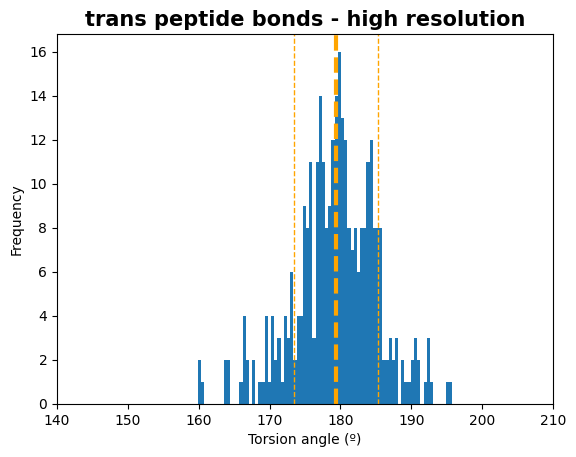


And here is the graph for cis bonds:



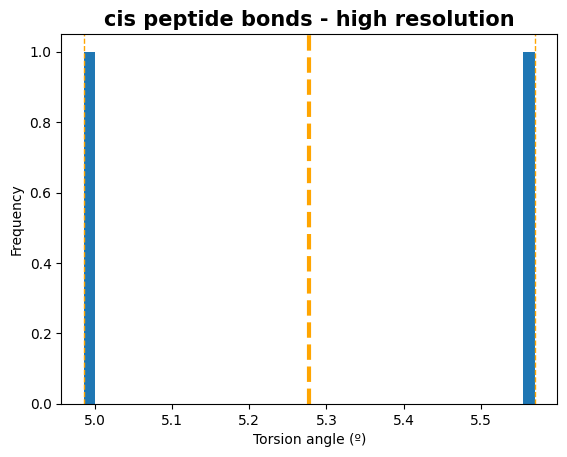


Trans peptide bonds account for 99.40% of the dataset, with an average of 179.31 and a standard deviation of 5.93.
  Cis peptide bonds account for 0.60% of the dataset, with an average of 5.28 and a standard deviation of 0.29.
331 bonds have been analysed.


In [24]:
#Torsion angle plot setup
#Empty list
trans_omega_angles = [ ]
cis_omega_angles = [ ]

for chain in model1 :
    for residue in chain :
      next_res = chain.next_residue ( residue )
      if next_res:
        omega = gemmi.calculate_omega(residue, next_res)
        if not isnan(degrees(omega)):
          if omega < 0.0 :
            omega = omega + 2*pi
          if omega < 0.5 : # CHOOSE A SENSIBLE VALUE!
            cis_omega_angles.append ( degrees ( omega ) )
            if degrees(omega) > 20 :
              print (path)
              print (residue)
              print (next_res)
          else :
            trans_omega_angles.append ( degrees ( omega ) )

print("\nHere is the graph for trans peptide bonds:\n")

plt.title ("trans peptide bonds - high resolution",
             fontsize = 15,
             fontweight = "bold" )

plt.hist(trans_omega_angles, bins=80)
plt.xlabel("Torsion angle (º)")
plt.ylabel("Frequency")
plt.axvline(np.average(trans_omega_angles), color='orange', linestyle='dashed',\
            linewidth=3)
plt.axvline(np.average(trans_omega_angles) - np.std(trans_omega_angles), \
            color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.average(trans_omega_angles) + np.std(trans_omega_angles), \
            color='orange', linestyle='dashed', linewidth=1)
plt.xlim(140,210)
plt.show ( )

print ("\nAnd here is the graph for cis bonds:\n")

plt.title ("cis peptide bonds - high resolution",
             fontsize = 15,
             fontweight = "bold" )

plt.hist(cis_omega_angles, bins=40)
plt.xlabel("Torsion angle (º)")
plt.ylabel("Frequency")
plt.axvline(np.average(cis_omega_angles), color='orange', linestyle='dashed',\
            linewidth=3)
plt.axvline(np.average(cis_omega_angles) - np.std(cis_omega_angles), \
            color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.average(cis_omega_angles) + np.std(cis_omega_angles), \
            color='orange', linestyle='dashed', linewidth=1)
plt.show ( )


print ("\nTrans peptide bonds account for {:0.2f}% of the dataset, " \
       "with an average of {:0.2f} and a standard deviation of {:0.2f}." \
       .format((len(trans_omega_angles)/(len(trans_omega_angles)+ \
       len(cis_omega_angles)))*100.0, np.average(trans_omega_angles), \
       np.std(trans_omega_angles) ))

print ("  Cis peptide bonds account for {:0.2f}% of the dataset, " \
       "with an average of {:0.2f} and a standard deviation of {:0.2f}." \
       .format((len(cis_omega_angles)/(len(trans_omega_angles)+ \
       len(cis_omega_angles)))*100.0, np.average(cis_omega_angles), \
       np.std(cis_omega_angles) ))

print( "{:d} bonds have been analysed.".format(len(cis_omega_angles) + \
                                             len(trans_omega_angles)))



Here is the graph for trans peptide bonds:



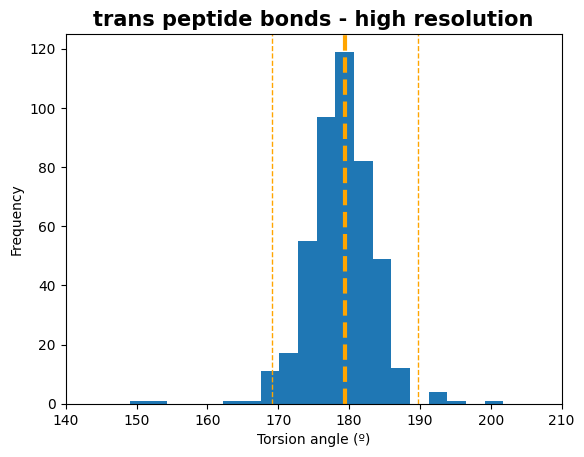


And here is the graph for cis bonds:



/Users/callumrobinson/miniconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/callumrobinson/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/callumrobinson/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/callumrobinson/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/callumrobinson/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


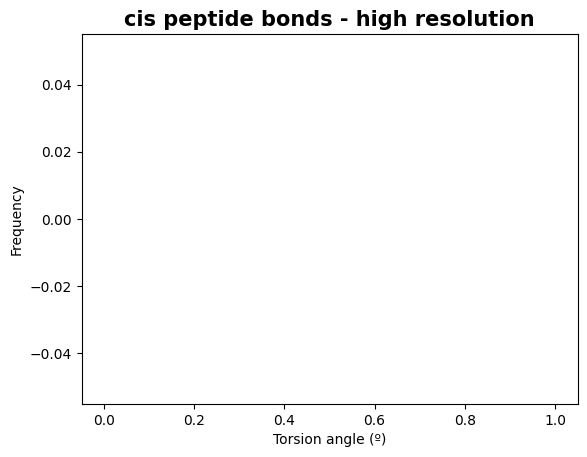


Trans peptide bonds account for 100.00% of the dataset, with an average of 179.41 and a standard deviation of 10.35.
  Cis peptide bonds account for 0.00% of the dataset, with an average of nan and a standard deviation of nan.
454 bonds have been analysed.


In [26]:
#Torsion angle plot setup
trans_omega_angles = [ ]
cis_omega_angles = [ ]

for chain in model2 :
    for residue in chain :
      next_res = chain.next_residue(residue)
      if next_res:
        omega = gemmi.calculate_omega(residue, next_res)
        if not isnan(degrees(omega)):
          if omega < 0.0 :
            omega = omega + 2*pi
          if omega < 0.5 :
            cis_omega_angles.append(degrees(omega))
            if degrees(omega) > 20 :
              print(path)
              print(residue)
              print(next_res)
          else :
            trans_omega_angles.append(degrees(omega))

print("\nHere is the graph for trans peptide bonds:\n")

plt.title ("trans peptide bonds - high resolution",
             fontsize = 15,
             fontweight = "bold" )

plt.hist(trans_omega_angles, bins=80)
plt.xlabel("Torsion angle (º)")
plt.ylabel("Frequency")
plt.axvline(np.average(trans_omega_angles), color='orange', linestyle='dashed',\
            linewidth=3)
plt.axvline(np.average(trans_omega_angles) - np.std(trans_omega_angles), \
            color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.average(trans_omega_angles) + np.std(trans_omega_angles), \
            color='orange', linestyle='dashed', linewidth=1)
plt.xlim(140,210)
plt.show()

print("\nAnd here is the graph for cis bonds:\n")

plt.title("cis peptide bonds - high resolution",
             fontsize = 15,
             fontweight = "bold" )

plt.hist(cis_omega_angles, bins=40)
plt.xlabel("Torsion angle (º)")
plt.ylabel("Frequency")
plt.axvline(np.average(cis_omega_angles), color='orange', linestyle='dashed',\
            linewidth=3)
plt.axvline(np.average(cis_omega_angles) - np.std(cis_omega_angles), \
            color='orange', linestyle='dashed', linewidth=1)
plt.axvline(np.average(cis_omega_angles) + np.std(cis_omega_angles), \
            color='orange', linestyle='dashed', linewidth=1)
plt.show()


print ("\nTrans peptide bonds account for {:0.2f}% of the dataset, " \
       "with an average of {:0.2f} and a standard deviation of {:0.2f}." \
       .format((len(trans_omega_angles)/(len(trans_omega_angles)+ \
       len(cis_omega_angles)))*100.0, np.average(trans_omega_angles), \
       np.std(trans_omega_angles) ))

print ("  Cis peptide bonds account for {:0.2f}% of the dataset, " \
       "with an average of {:0.2f} and a standard deviation of {:0.2f}." \
       .format((len(cis_omega_angles)/(len(trans_omega_angles)+ \
       len(cis_omega_angles)))*100.0, np.average(cis_omega_angles), \
       np.std(cis_omega_angles) ))

print( "{:d} bonds have been analysed.".format(len(cis_omega_angles) + \
                                             len(trans_omega_angles)))


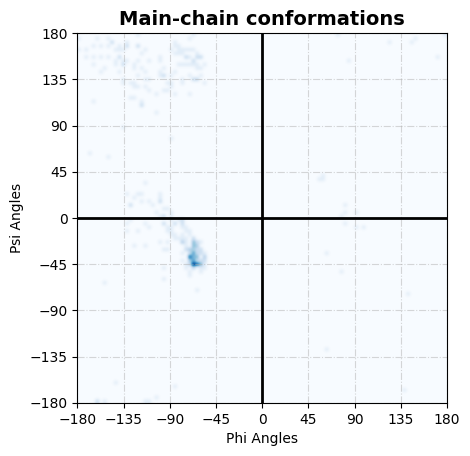

In [73]:
#rama plot (set 1)

#variable setup
residue_numbers = []
phi_angles = []
psi_angles = []

for chain in model1:
    for residue in chain:
        next_res = chain.next_residue(residue)
        prev_res = chain.previous_residue(residue)
        if next_res:
            phi, psi = gemmi.calculate_phi_psi(prev_res, residue, next_res)
            if not isnan(phi) and not isnan(psi):
                phi_angles.append(degrees(phi)) 
                psi_angles.append(degrees(psi))


fig, ax = plt.subplots()
ax.grid(True, linestyle='-.', alpha=0.5)

plt.title("Main-chain conformations", fontsize = 14, fontweight = "bold" )
plt.xlabel('Phi Angles')
plt.ylabel('Psi Angles')

plt.plot([0,0],[-180,180], linewidth=2, color='black' )
plt.plot([-180,180],[0,0], linewidth=2, color='black' )

heatmap, xedges, yedges = np.histogram2d(phi_angles, psi_angles, bins=100)
extent = [-180, 180, -180, 180]
plt.xticks([-180, -135, -90, -45, 0, 45, 90, 135, 180 ])
plt.yticks([-180, -135, -90, -45, 0, 45, 90, 135, 180 ])
plt.imshow(
heatmap.T, 
cmap="Blues",
interpolation="gaussian",
extent=extent, 
origin='lower', 
norm=None)
plt.show()

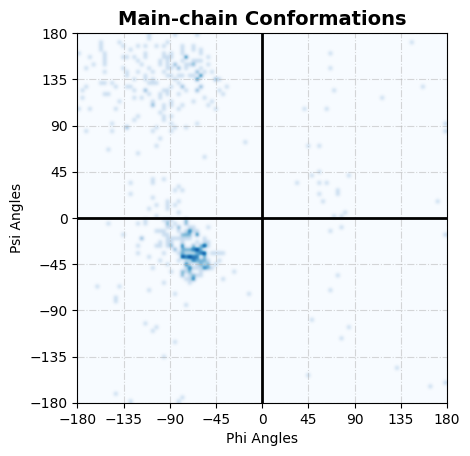

In [74]:
#rama plot (set 2)

#variable setup
residue_numbers = []
phi_angles = []
psi_angles = []

for chain in model2:
    for residue in chain:
        next_res = chain.next_residue(residue)
        prev_res = chain.previous_residue(residue)
        if next_res:
            phi, psi = gemmi.calculate_phi_psi(prev_res, residue, next_res)
            if not isnan(phi) and not isnan(psi):
                phi_angles.append(degrees(phi)) 
                psi_angles.append(degrees(psi))


fig, ax = plt.subplots()
ax.grid(True, linestyle='-.', alpha=0.5)

plt.title("Main-chain Conformations", fontsize = 14, fontweight = "bold" )
plt.xlabel('Phi Angles')
plt.ylabel('Psi Angles')

plt.plot([0,0],[-180,180], linewidth=2, color='black' )
plt.plot([-180,180],[0,0], linewidth=2, color='black' )

heatmap, xedges, yedges = np.histogram2d(phi_angles, psi_angles, bins=100)
extent = [-180, 180, -180, 180]
plt.xticks([-180, -135, -90, -45, 0, 45, 90, 135, 180 ])
plt.yticks([-180, -135, -90, -45, 0, 45, 90, 135, 180 ])
plt.imshow(
heatmap.T, 
cmap="Blues",
interpolation='Gaussian',
extent=extent, 
origin='lower', 
norm=None)
plt.show()

In [ ]:
#rama plot >1 sd .. original rama study .. comparison .. heat map .. 